# Building A Handwritten Digits Classifier using Cross Validation

In this project machine learning using k-fold cross validation is used to build a handwritten digits classifier.

In machine learning normally a dataset is split in a training set to train the model and a test set to validate the model on data it has never seen before. It is common to use a split of 80/20 for the training/test set. When you don't have a large dataset this will result in a small test set which is only 20% of this data. Cross validation is used to overcome this problem. In cross validation the data is splitted more than ones (k times). As a result after all iterations all data is used as test set as can be seen in the figure below where the data is splitted in 6 folds (k=6).

 <img align="left" src="_images/Cross_validation_k6.PNG">  <br>
 <br>
 <br>
 <br>
 <br>
 <br>

Splitting the data in a training and test set used for cross validation can be done in several ways. It is possible to use a standard library or you can write the code yourself. At the start of this project I planned to use the standard library KFold from sklearn, but after a while I was curious if it was possible to write the code myself to get the same result. As a result the k-nearest neighbor algorithm with cross validation is used to build a handwritten digits classifier. For the cross validation the standard library Kfold is used and besides that I wrote the code myself to get the same results.


In [1]:
#import the libraries to be used
import pandas as pd
import numpy as np
import math
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline

The dataset with images to be used for the training the machine learning algorithm can be imported from sklearn.datasets using load_digits. The library is imported above and the data is loaded below.

In [2]:
# get the digits data and show the array
data = load_digits(return_X_y=True)
data[0]

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

The data is loaded in a Numpy 2D array and for further processing it is needed to transform it into a pandas dataframe

In [3]:
#transform the Numpy 2D array into a pandas dataframe
digits = pd.DataFrame(data[0])
target = pd.DataFrame(data[1])
tar = target.values.ravel() # create an array with values
digits

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


As you can see in the dataframe above the digits are described with a set of 64 numbers which represent a value on a gray scale. Below for a selection of 9 digits the numbers of the gray scale are transformed into an image, which can be plotted.

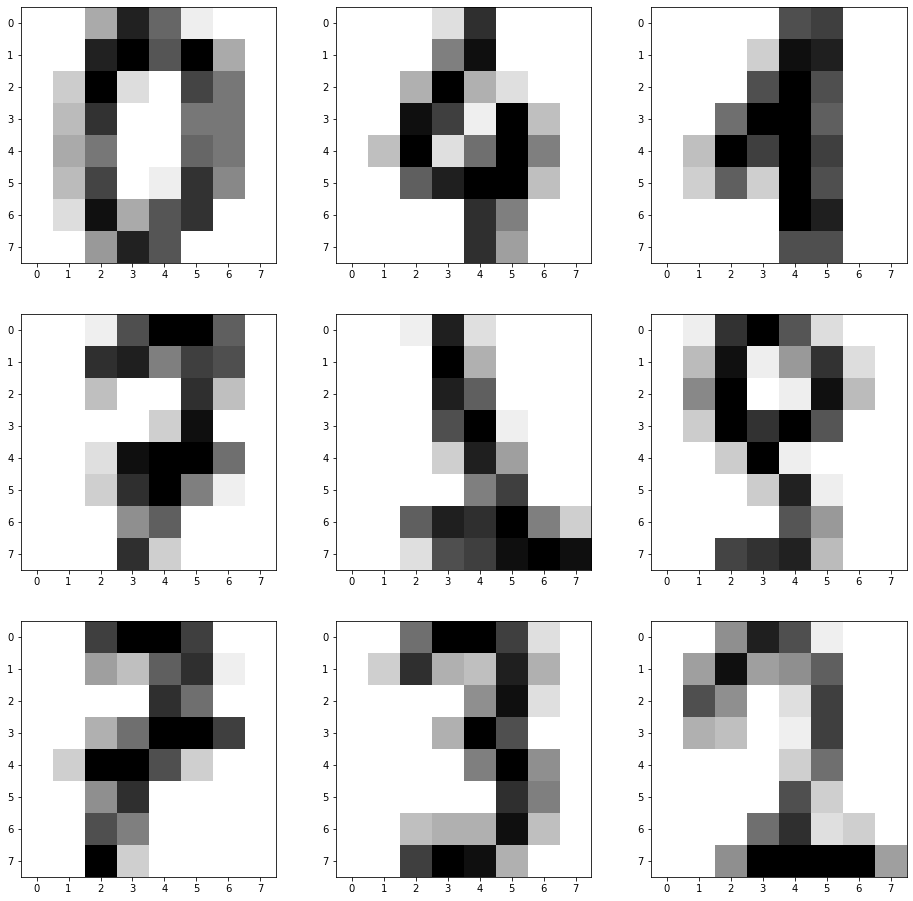

In [4]:
# plot 9 images from the dataframe
fig = plt.figure(figsize=(16,16))

select_rows = [0,100,200,300,1000,1100,1200,1300, 1400]

columns = 3
rows = 3

for i in range(1, columns*rows +1):
    first_image = digits.iloc[select_rows[i-1]]
    np_image = first_image.values
    np_image = np_image.reshape(8,8)
    fig.add_subplot(rows, columns, i)
    plt.imshow(np_image, cmap='gray_r')
plt.show()

## K-nearest neighbors algorithm

Below the workflow for k-fold cross validation algorithm is described:

- start with splitting the full dataset into k equal length partitions.
 - selecting k-1 partitions as the training set and
 - selecting the remaining partition as the test set (values between t0 and t1)
 
 <img align="left" src="_images/Cross_validation.PNG">  <br>
 <br>
 <br>
 <br>
 <br>
 <br>
 <br>

- training the model on the training set.
- using trained model to predict labels on the test fold.
- computing the test fold's error metric.
- repeating all of the above steps k-1 times, until each partition has been used as the test set for an iteration.
- calculating the mean of the k error values.

In [5]:
# function for cross validation (k fold cross validation)

k = 6
def cross_validation(k):
    kf = KFold(k, shuffle=True, random_state=1)
    knn = KNeighborsClassifier()
    mses = cross_val_score(knn, digits, tar, cv=kf)
    return mses

cross_val_score = cross_validation(k)
cross_val_score

array([0.99333333, 0.98333333, 0.97666667, 0.98662207, 0.98662207,
       0.98662207])

Above the results for the 6 iterations of the cross validation using the KFold function are shown. Below the function is written by myself and the results are the same as from the workflow above.

In [6]:
# Workflow for k-fold cross validation
k = 6

# function for training k-nn models

def training(train, target):
    knn = KNeighborsClassifier()
    knn.fit(train, target)
    return knn 

# function for test k-nn models

def testing(knn, test_set):
    predictions = knn.predict(test_set)
    return predictions

# function for cross validation (k fold cross validation)

def cross_validation(k):
    result = []
    predictions = []
    y_test_list = []
    t0 = 0
    t1 = 0
    for i in range(k):
        #Determine the size to be used for splitting the dataset
        step = (len(digits)-t1) / (k - i)
        t1 += int(math.ceil(step))
        new_step = t1-t0        
        
        #shuffle the digits en tar dataset
        digits_shuffled, tar_shuffled = shuffle(digits, tar, random_state=1)
        
        #Create the train en test sets (X_train, y_train, X_test, y_test)
        
        #for X_train select values < t0 and > t1 and concatenate the data
        X0 = digits_shuffled[:t0]
        X1 = digits_shuffled[t1:]
        frames = [X0, X1]
        X_train = pd.concat(frames)
        
        #for y_train select values < t0 and > t1 and concatenate the data
        y0 = tar_shuffled[:t0]
        y1 = tar_shuffled[t1:]
        frames_y = [y0, y1]
        y_train = np.concatenate(frames_y)
        
        #for the test set select values between t0 and t1
        X_test = digits_shuffled[t0:t1]
        y_test = tar_shuffled[t0:t1]
        
        #train en test the model
        model = training(X_train, y_train)
        prediction = testing(model, X_test)
        correct = prediction - y_test
        number_correct = len(correct[correct==0])/new_step
        
        #store the results to be returned in the end
        result.append(number_correct)
        predictions.append(prediction)
        y_test_list.append(y_test)
        
        #Set t0 for the next iteration
        t0 = t1
    return result, predictions, y_test_list

result_tot, predict_y, y_test_list = cross_validation(k)
result_tot

[0.9933333333333333,
 0.9833333333333333,
 0.9766666666666667,
 0.9866220735785953,
 0.9866220735785953,
 0.9866220735785953]

Now the score of the 6 iterations is present. The next step is to calculate the mean of the 6 error values.

In [7]:
# Calculate the mean of the k error values
mean_score = np.mean(result_tot)
mean_score

0.9855332590115199

After calculating the mean error value, it is interesting to see which digit is not predicted correctly. Below a list is shown of the predictions which are not correct

In [8]:
# predictions vs expected results from the testset

predict_y = np.concatenate(predict_y)
y_test_list = np.concatenate(y_test_list)

predict_result = pd.DataFrame(predict_y, columns=['predictions'])
predict_result['y_test']=y_test_list

# select the items where the prediction is not equal to the expected result
wrong = predict_result[predict_result['predictions'] != predict_result['y_test']]
wrong

,predictions,y_test
249,9,7
298,7,2
462,5,1
523,1,8
537,5,9
540,8,9
576,1,9
609,3,9
635,7,3
648,3,9


In the table above the 26 results out of 1797 are shown which are not predicted correctly 

## Conclusion

In this project machine learning using k-fold cross validation is used to build a handwritten digits classifier. 
The k-fold cross validation is demonstrated using the KFold function from sklearn and it is compared to a workflow written by myself to get the same results. As the outcome of both methods is the same, it can be concluded that it is possible to write your own code to create a workflow for cross validation. It was a nice learning experience for me to get more insights of the internals of a standard function like KFold.
The algorithm which is built in this project can predict a digit which is correct in 98.55% of the cases.

Next steps:
- Try making changes in the workflow to improve correct predictions percentage
- Use the existing pipeline to try other machine learning models like Decision Tree Models or Random Forest Models